In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime


ticker = 'ITC.NS'  
df = yf.download(ticker)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,5.550000,5.600000,5.533333,5.583333,3.198997,985500
1996-01-02,5.466666,5.566666,5.288888,5.372222,3.078039,7470000
1996-01-03,5.133333,5.254444,5.101111,5.200000,2.979364,15160500
1996-01-04,5.200000,5.332222,5.144444,5.297777,3.035386,12397500
1996-01-05,5.297777,5.277777,5.188888,5.202222,2.980637,5008500
...,...,...,...,...,...,...
2024-06-20,424.049988,426.500000,421.500000,423.299988,423.299988,14585806
2024-06-21,425.000000,425.299988,418.549988,419.600006,419.600006,25205627
2024-06-24,420.000000,423.950012,420.000000,423.299988,423.299988,9362433


In [17]:
import numpy as np
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(25, return_sequences=False))
model.add(Dense(10))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=10, epochs=16)

[array([2.87131898e-03, 2.43868576e-03, 2.08574824e-03, 2.28612493e-03,
       2.09030194e-03, 1.76241175e-03, 1.73508659e-03, 1.70093185e-03,
       1.75557924e-03, 1.85804541e-03, 1.74647183e-03, 1.71459296e-03,
       1.71231611e-03, 1.58480358e-03, 1.14533980e-03, 1.07702837e-03,
       4.80450052e-04, 8.88031056e-05, 0.00000000e+00, 0.00000000e+00])]
[0.0004804500519033899]

[array([2.87131898e-03, 2.43868576e-03, 2.08574824e-03, 2.28612493e-03,
       2.09030194e-03, 1.76241175e-03, 1.73508659e-03, 1.70093185e-03,
       1.75557924e-03, 1.85804541e-03, 1.74647183e-03, 1.71459296e-03,
       1.71231611e-03, 1.58480358e-03, 1.14533980e-03, 1.07702837e-03,
       4.80450052e-04, 8.88031056e-05, 0.00000000e+00, 0.00000000e+00]), array([2.43868576e-03, 2.08574824e-03, 2.28612493e-03, 2.09030194e-03,
       1.76241175e-03, 1.73508659e-03, 1.70093185e-03, 1.75557924e-03,
       1.85804541e-03, 1.74647183e-03, 1.71459296e-03, 1.71231611e-03,
       1.58480358e-03, 1.14533980e-03, 1.07702

In [18]:
predictions = model.predict(x_train)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_train,predictions)
r2

212/212 [==============================] - 3s 9ms/step


0.9992569558750839

In [19]:
from  sklearn.metrics import r2_score
test_data = scaled_data[training_data_len - 20: , :]

x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_test,predictions)
r2

12/12 [==============================] - 0s 9ms/step


0.9736881348032423

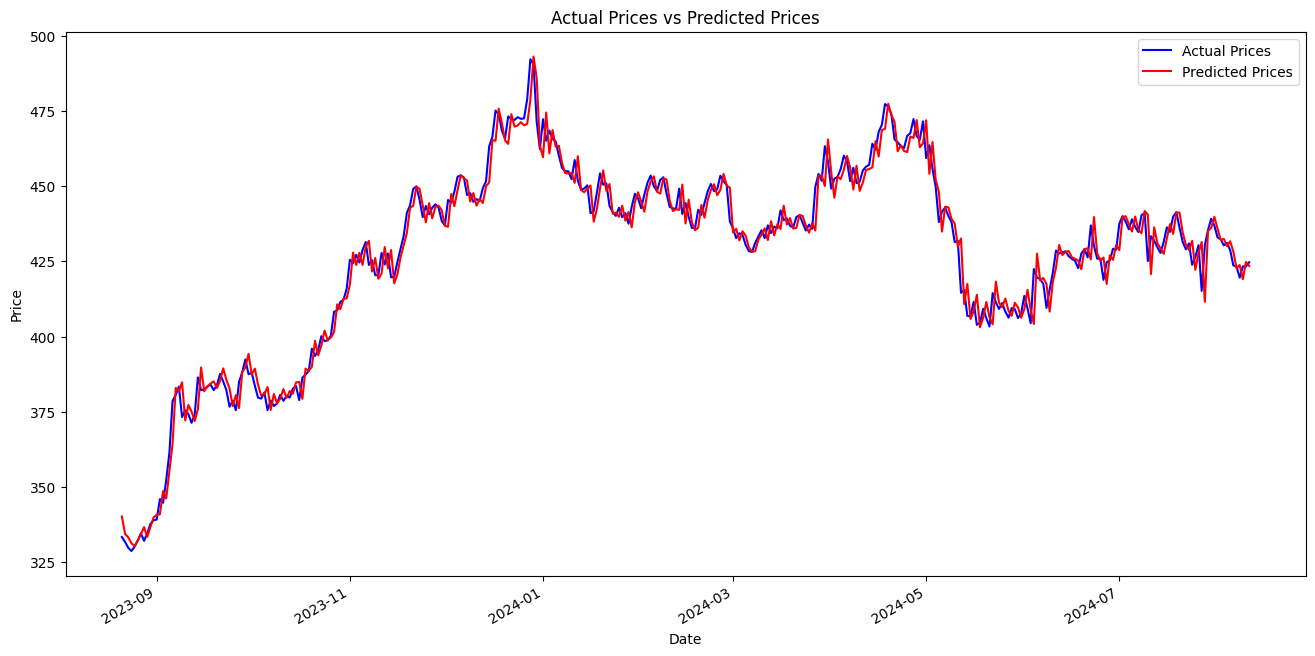

In [20]:
import matplotlib.pyplot as plt
y_test = scaler.inverse_transform(y_test)
predictions = scaler.inverse_transform(predictions)
test_dates = pd.date_range(start='2023-08-21', periods=len(y_test), freq='D')

# Plot the data
plt.figure(figsize=(16, 8))
plt.plot(test_dates, y_test, color='blue', label='Actual Prices')
plt.plot(test_dates, predictions, color='red', label='Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()

In [21]:
import joblib


model_file_path = '7.joblib'
scaler_file_path = 'scaler7.joblib'

joblib.dump(model, model_file_path)
joblib.dump(scaler, scaler_file_path)

print(f"Model saved to {model_file_path}")
print(f"Scaler saved to {scaler_file_path}")

Model saved to 7.joblib
Scaler saved to scaler7.joblib
